### Read Dataset


In [4]:
import pandas as  pd #library untuk manipulasi data

In [5]:
df_fish = pd.read_csv('fish_data.csv') #membaca dataset fish_data.csv
df_fish #menampilkan dataset

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [6]:
df_fish.info() #menampilkan informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [7]:
df_fish.describe() #menampilkan deskripsi dataset

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [8]:
pd.unique(df_fish['species']) #menampilkan nilai unik pada kolom species


array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [9]:
df_fish['species'].value_counts() #menampilkan frekuensi pada kolom species

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder as label_encoder
en = label_encoder() #membuat objek label_encoder
df_fish['species'] = en.fit_transform(df_fish['species']) #mengubah species menjadi angka
df_fish['species'].value_counts()

species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

### Split Dependent (Target / Label) Independent (Atribut) Variabel

In [11]:
x = df_fish.drop('species', axis=1) #menghilangkan kolom species,selainnya akan dimasukkan ke dalam variabel x
y = df_fish['species'] #memasukkan kolom species ke dalam variabel y

### Fitur Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler #library untuk membuat data numerik berada di rentang nilai yang sama atau berdekatan
scaler = MinMaxScaler()
scaler.fit(x) 
x = scaler.transform(x) 


### Split Train Test

In [14]:
from sklearn.model_selection import train_test_split #library untuk membagi dataset menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Klasifikasi KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier #import library KNN

### Training / Fit Model

In [28]:
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean').fit(x_train, y_train)
knn #menentukan nilai n_neighbors dan metric

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

### Prediksi / Test


In [29]:
y_pred = knn.predict(x_test) #melakukan prediksi
y_pred #menampilkan hasil prediksi

array([6, 4, 3, ..., 6, 6, 6])

### Cek Akurasi dan Evaluasi

In [30]:
from sklearn.metrics import accuracy_score #import library accuracy_score
from sklearn.metrics import classification_report #import library classification_report
from sklearn.metrics import confusion_matrix #import library confusion_matrix
import seaborn as sb #import library seaborn

In [31]:
print("Nilai akurasi: ",accuracy_score(y_test, y_pred)) #menampilkan akurasi


Nilai akurasi:  0.9444444444444444


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      0.99      1.00       134
           2       0.74      0.80      0.77       147
           3       0.99      0.99      0.99       135
           4       1.00      1.00      1.00       128
           5       1.00      1.00      1.00       126
           6       1.00      1.00      1.00       109
           7       0.77      0.71      0.74       145
           8       1.00      1.00      1.00       154

    accuracy                           0.94      1224
   macro avg       0.94      0.94      0.94      1224
weighted avg       0.94      0.94      0.94      1224



<Axes: >

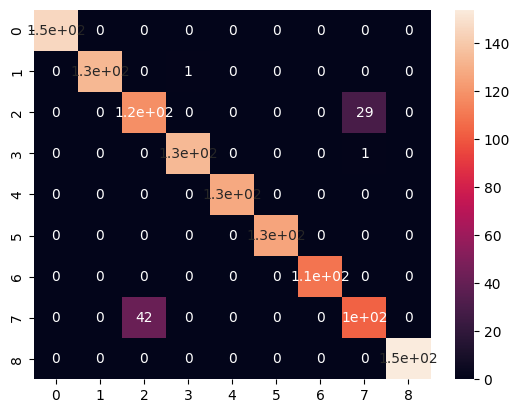

In [20]:
print(classification_report(y_test, y_pred)) #menampilkan report klasifikasi
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True) #menampilkan confusion matrix

### Mencari nilai k yang terbaik

In [22]:
n_akurasi = []
for k in range(1, 500):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    n_akurasi.append(accuracy_score(y_test, y_pred))
    
print(n_akurasi)
print("Nilai akurasi tertinggi berada pada nilai K: ",n_akurasi.index(max(n_akurasi))+1)
print("Nilai akurasi tertinggi: ",max(n_akurasi))

[0.9223856209150327, 0.9240196078431373, 0.9313725490196079, 0.9362745098039216, 0.9281045751633987, 0.9321895424836601, 0.9297385620915033, 0.9321895424836601, 0.9281045751633987, 0.9370915032679739, 0.9362745098039216, 0.9370915032679739, 0.9354575163398693, 0.9444444444444444, 0.9387254901960784, 0.9395424836601307, 0.9419934640522876, 0.940359477124183, 0.9419934640522876, 0.9411764705882353, 0.9362745098039216, 0.9411764705882353, 0.9387254901960784, 0.940359477124183, 0.9428104575163399, 0.940359477124183, 0.9419934640522876, 0.940359477124183, 0.9428104575163399, 0.9395424836601307, 0.9395424836601307, 0.9387254901960784, 0.940359477124183, 0.9387254901960784, 0.9387254901960784, 0.9370915032679739, 0.9395424836601307, 0.9362745098039216, 0.9370915032679739, 0.9370915032679739, 0.9362745098039216, 0.9379084967320261, 0.9338235294117647, 0.9354575163398693, 0.9338235294117647, 0.934640522875817, 0.9354575163398693, 0.9370915032679739, 0.9379084967320261, 0.9379084967320261, 0.938

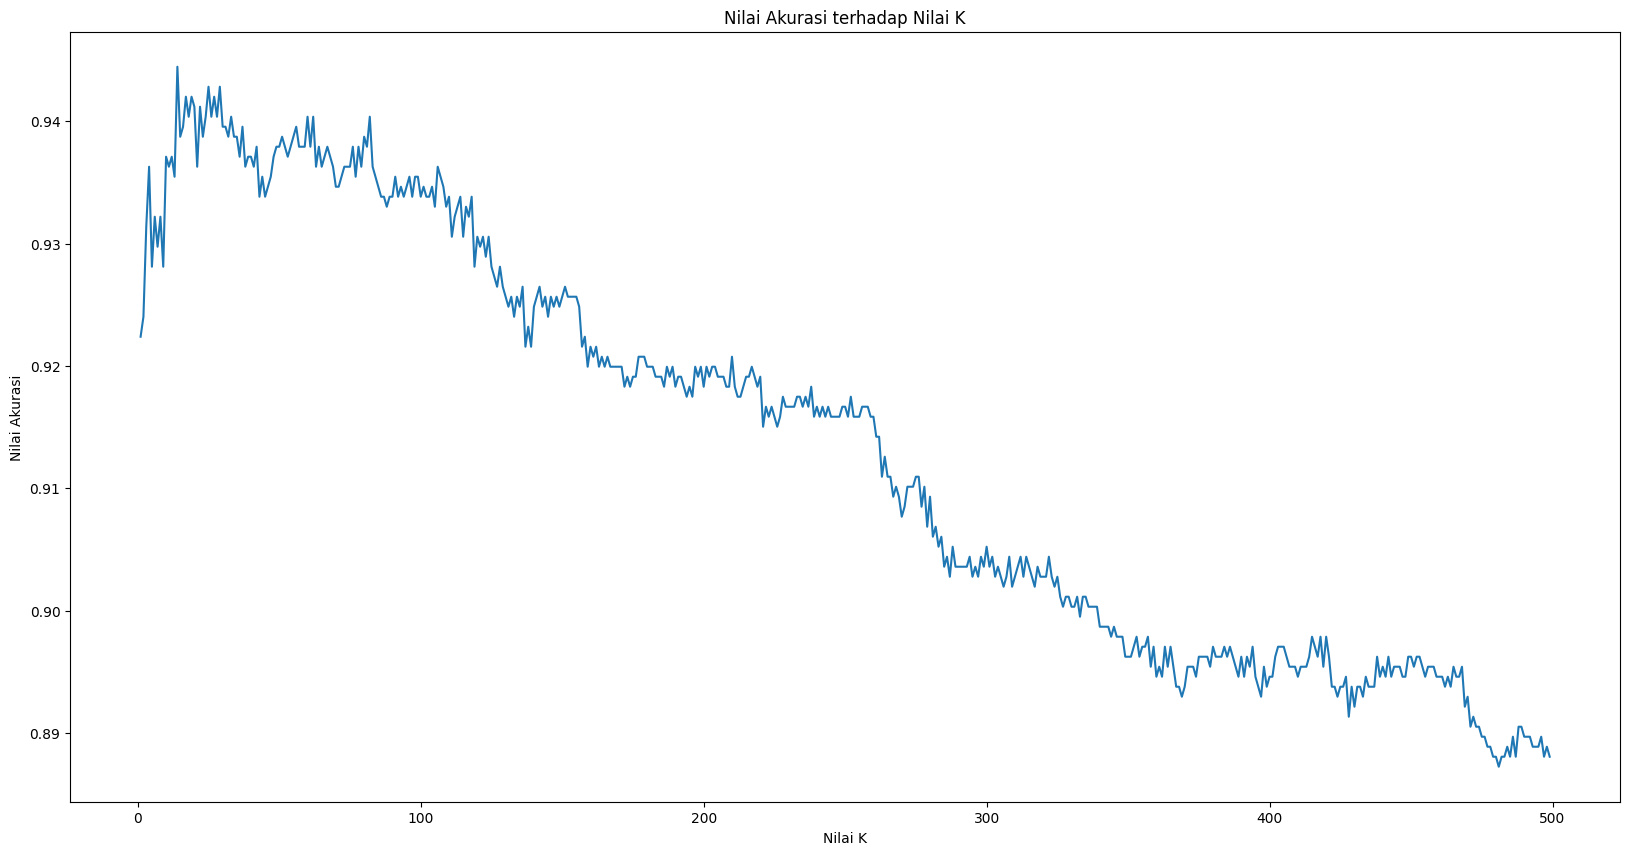

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(range(1, 500), n_akurasi)
plt.title('Nilai Akurasi terhadap Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Nilai Akurasi')
plt.show()

### Klasifikasi Data Baru

In [27]:
new_fish = [[7.0, 4.05, 0.19]] #memasukkan data baru
knn.predict(new_fish)
print(knn.predict(new_fish))


[8]


### Model

In [33]:
import pickle #library untuk menyimpan model
pickle.dump(knn, open('fish.pkl', 'wb'))